# Statističke Procene i Error Bars

## Seminarski rad - SISJ

**Autor:** Mihajlovic Luka 2020/0136, Ilic Andrija 2020/0236  
---

### 1. **Što su statističke procene?**

Statističke procene pomažu nam da razumemo podatke kroz **centralne tendencije** i **mere nesigurnosti**.

**Osnovni koncepti:**
- **Procena** - vrednost koju računamo iz uzorka (npr. mean, median)
- **Error bars** - prikazuju nesigurnost oko procene
- **Confidence interval** - interval u kome se verovatno nalazi prava vrednost
- **Bootstrap** - metoda za procenu nesigurnosti

**Tipovi error bars:**
- **Standard deviation (sd)** - pokazuje rasipanje podataka
- **Standard error (se)** - pokazuje preciznost procene
- **Confidence interval (ci)** - interval pouzdanosti (obično 95%)

### **Glavne Seaborn funkcije:**

- **barplot()** - bar chart sa error bars
- **pointplot()** - tačke sa error bars
- **regplot()** - regresija sa confidence bands
- **errorbar** parametar - kontroliše tip error bars

---

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

# Osnovno podešavanje
sns.set_theme()
print("✅ Biblioteke učitane!")
print(f"Seaborn verzija: {sns.__version__}")

# Učitavanje podataka
tips = sns.load_dataset('tips')
penguins = sns.load_dataset('penguins')

print(f"Tips dataset: {tips.shape}")
print(f"Penguins dataset: {penguins.shape}")

# Osnovne statistike
print(f"\n📊 OSNOVNE STATISTIKE za 'total_bill':")
mean_bill = tips['total_bill'].mean()
std_bill = tips['total_bill'].std()
se_bill = tips['total_bill'].std() / np.sqrt(len(tips))

print(f"Mean (prosek): ${mean_bill:.2f}")
print(f"Standard deviation: ${std_bill:.2f}")
print(f"Standard error: ${se_bill:.2f}")

print(f"\n🔍 Interpretacija:")
print(f"• Prosečan račun je ${mean_bill:.2f}")
print(f"• Računi se kreću oko ±${std_bill:.2f} od proseka")
print(f"• Naša procena proseka je precizna na ±${se_bill:.2f}")

✅ Biblioteke učitane!
Seaborn verzija: 0.13.2
Tips dataset: (244, 7)
Penguins dataset: (344, 7)

📊 OSNOVNE STATISTIKE za 'total_bill':
Mean (prosek): $19.79
Standard deviation: $8.90
Standard error: $0.57

🔍 Interpretacija:
• Prosečan račun je $19.79
• Računi se kreću oko ±$8.90 od proseka
• Naša procena proseka je precizna na ±$0.57


### 2. Error Bars - različiti tipovi

**Error bars** pokazuju nesigurnost oko naše procene.

**Tipovi error bars:**
- **sd** - standard deviation (rasipanje podataka)
- **se** - standard error (preciznost procene)
- **ci** - confidence interval (interval pouzdanosti)
- **pi** - prediction interval (opseg novih vrednosti)

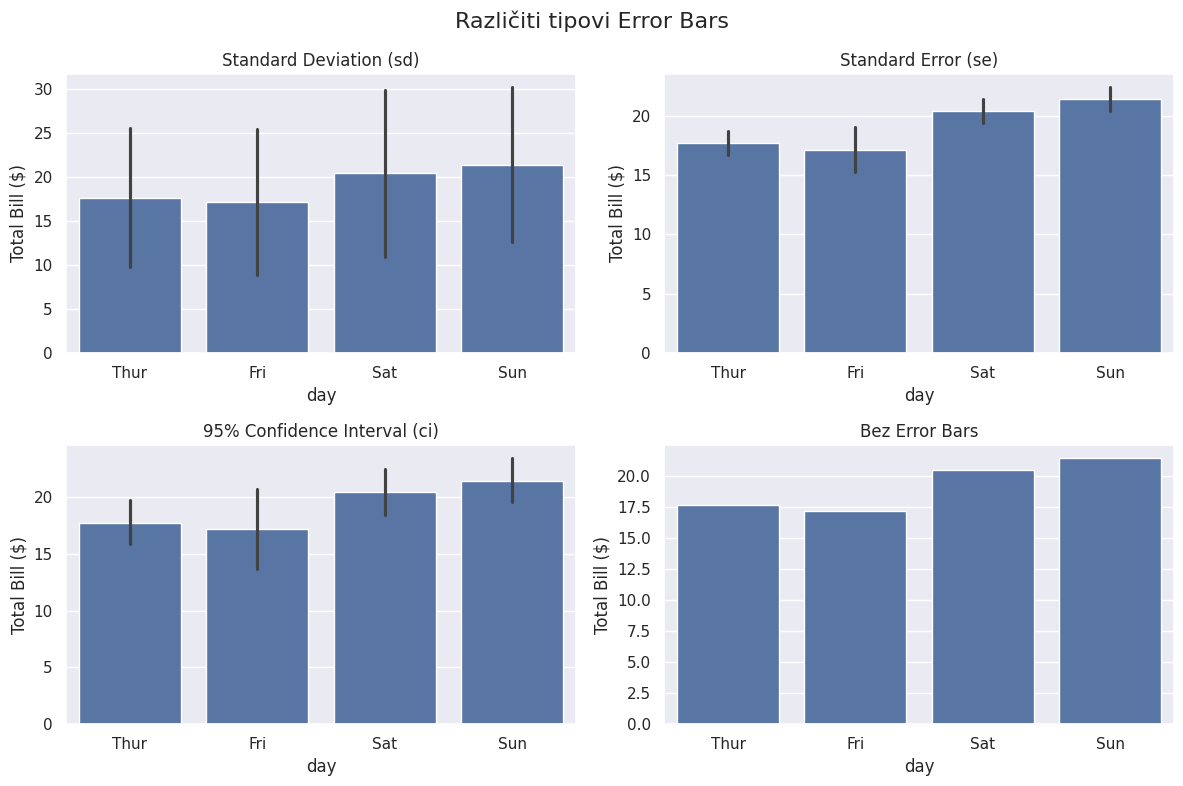

🔍 OBJAŠNJENJE ERROR BARS:
• SD: Pokazuje koliko se podaci rasipaju oko proseka
• SE: Pokazuje koliko je precizna naša procena proseka
• CI: Sa 95% sigurnošću, pravi prosek je u ovom intervalu
• Kraći error bars = preciznija procena


In [22]:
# Error bars - različiti tipovi
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Različiti tipovi Error Bars', fontsize=16)

# 1. Standard deviation
sns.barplot(data=tips, x='day', y='total_bill', errorbar='sd', ax=axes[0,0])
axes[0,0].set_title('Standard Deviation (sd)')
axes[0,0].set_ylabel('Total Bill ($)')

# 2. Standard error
sns.barplot(data=tips, x='day', y='total_bill', errorbar='se', ax=axes[0,1])
axes[0,1].set_title('Standard Error (se)')
axes[0,1].set_ylabel('Total Bill ($)')

# 3. Confidence interval (default)
sns.barplot(data=tips, x='day', y='total_bill', errorbar='ci', ax=axes[1,0])
axes[1,0].set_title('95% Confidence Interval (ci)')
axes[1,0].set_ylabel('Total Bill ($)')

# 4. Bez error bars
sns.barplot(data=tips, x='day', y='total_bill', errorbar=None, ax=axes[1,1])
axes[1,1].set_title('Bez Error Bars')
axes[1,1].set_ylabel('Total Bill ($)')

plt.tight_layout()
plt.show()

print("🔍 OBJAŠNJENJE ERROR BARS:")
print("• SD: Pokazuje koliko se podaci rasipaju oko proseka")
print("• SE: Pokazuje koliko je precizna naša procena proseka") 
print("• CI: Sa 95% sigurnošću, pravi prosek je u ovom intervalu")
print("• Kraći error bars = preciznija procena")

### 3. Bar plots vs Point plots

**Bar plots** i **Point plots** različito prikazuju iste informacije:

- **Bar plots** - visina bara = procena, error bars = nesigurnost
- **Point plots** - tačka = procena, linije = nesigurnost
- **Point plots** bolje za poređenje trendova

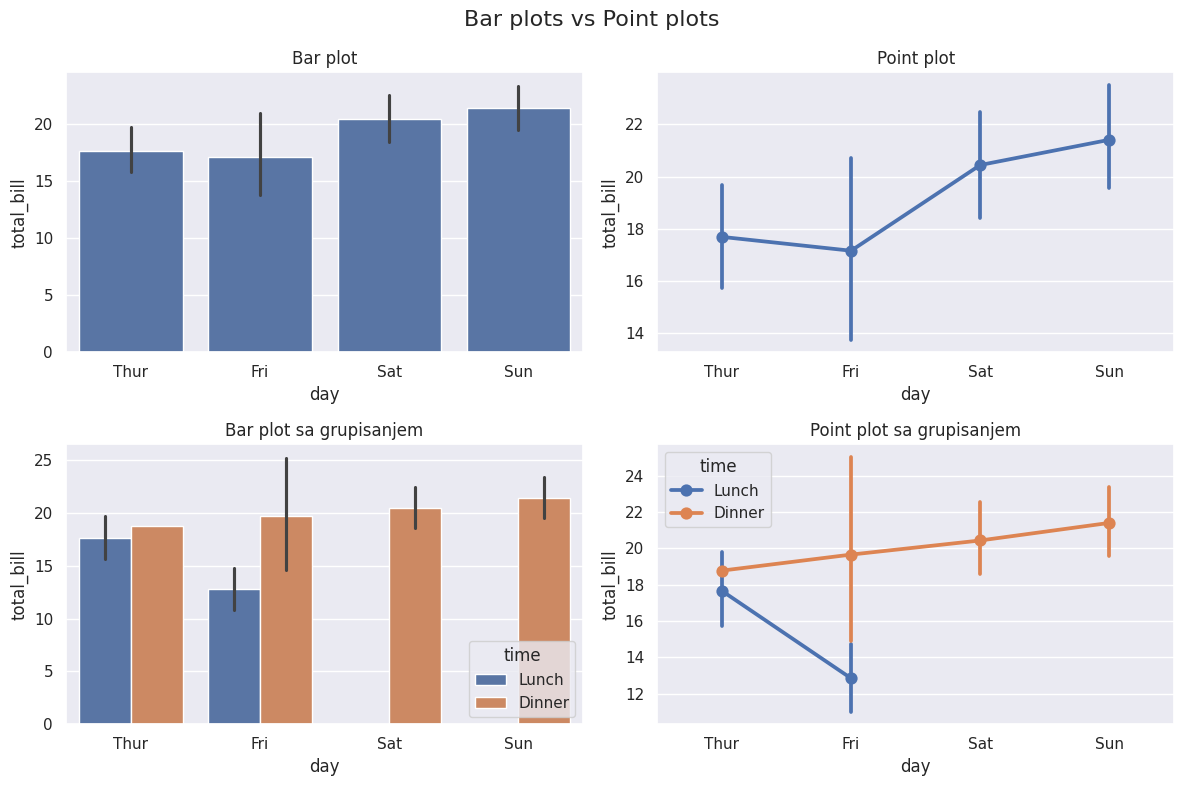

📊 STATISTIKE PO DANIMA:
      count   mean   std
day                     
Thur     62  17.68  7.89
Fri      19  17.15  8.30
Sat      87  20.44  9.48
Sun      76  21.41  8.83

💡 KADA KORISTITI:
• Bar plot: za jasno prikazavanje pojedinačnih vrednosti
• Point plot: za poređenje trendova između grupa
• Point plot: kada imamo puno kategorija


In [23]:
# Bar plots vs Point plots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Bar plots vs Point plots', fontsize=16)

# 1. Bar plot osnovni
sns.barplot(data=tips, x='day', y='total_bill', ax=axes[0,0])
axes[0,0].set_title('Bar plot')

# 2. Point plot osnovni
sns.pointplot(data=tips, x='day', y='total_bill', ax=axes[0,1])
axes[0,1].set_title('Point plot')

# 3. Bar plot sa grupisanjem
sns.barplot(data=tips, x='day', y='total_bill', hue='time', ax=axes[1,0])
axes[1,0].set_title('Bar plot sa grupisanjem')

# 4. Point plot sa grupisanjem
sns.pointplot(data=tips, x='day', y='total_bill', hue='time', ax=axes[1,1])
axes[1,1].set_title('Point plot sa grupisanjem')

plt.tight_layout()
plt.show()

# Statistička analiza
daily_stats = tips.groupby('day', observed=False)['total_bill'].agg(['count', 'mean', 'std']).round(2)
print("📊 STATISTIKE PO DANIMA:")
print(daily_stats)

print("\n💡 KADA KORISTITI:")
print("• Bar plot: za jasno prikazavanje pojedinačnih vrednosti")
print("• Point plot: za poređenje trendova između grupa")
print("• Point plot: kada imamo puno kategorija")

### 4. Različiti estimatori

**Estimator** određuje kako računamo centralnu vrednost:

- **mean** - aritmetička sredina (default)
- **median** - srednja vrednost
- **sum** - zbir svih vrednosti
- **count** - broj observacija

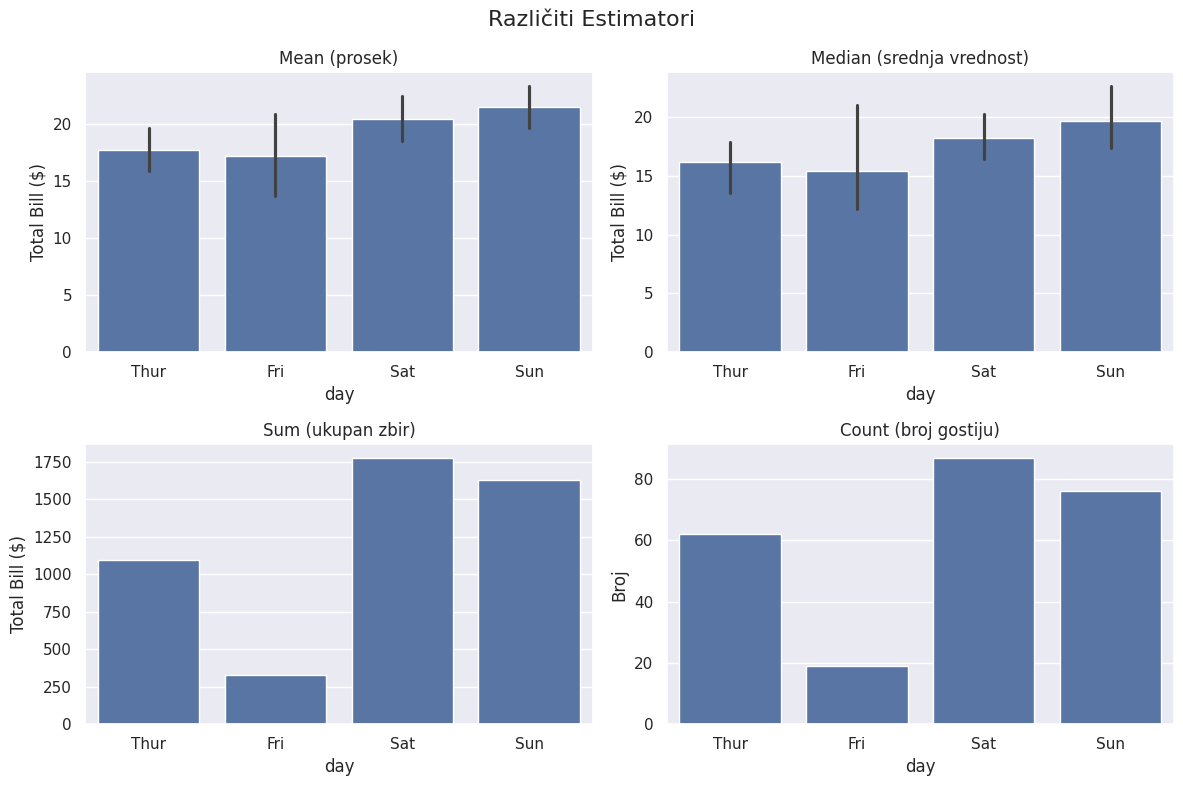

🔍 MEAN vs MEDIAN po danima:
       mean  median
day                
Thur  17.68   16.20
Fri   17.15   15.38
Sat   20.44   18.24
Sun   21.41   19.63

💡 RAZLIKA MEAN vs MEDIAN:
• Mean: osećljiv na outliere (ekstremne vrednosti)
• Median: robusniji, manje utiču outlieri
• Ako mean > median → pozitivno skewed podaci


In [24]:
# Različiti estimatori
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Različiti Estimatori', fontsize=16)

# 1. Mean (default)
sns.barplot(data=tips, x='day', y='total_bill', estimator='mean', ax=axes[0,0])
axes[0,0].set_title('Mean (prosek)')
axes[0,0].set_ylabel('Total Bill ($)')

# 2. Median
sns.barplot(data=tips, x='day', y='total_bill', estimator='median', ax=axes[0,1])
axes[0,1].set_title('Median (srednja vrednost)')
axes[0,1].set_ylabel('Total Bill ($)')

# 3. Sum
sns.barplot(data=tips, x='day', y='total_bill', estimator='sum', errorbar=None, ax=axes[1,0])
axes[1,0].set_title('Sum (ukupan zbir)')
axes[1,0].set_ylabel('Total Bill ($)')

# 4. Count
sns.countplot(data=tips, x='day', ax=axes[1,1])
axes[1,1].set_title('Count (broj gostiju)')
axes[1,1].set_ylabel('Broj')

plt.tight_layout()
plt.show()

# Poređenje mean vs median
day_comparison = tips.groupby('day', observed=False)['total_bill'].agg(['mean', 'median']).round(2)
print("🔍 MEAN vs MEDIAN po danima:")
print(day_comparison)

print(f"\n💡 RAZLIKA MEAN vs MEDIAN:")
print(f"• Mean: osećljiv na outliere (ekstremne vrednosti)")
print(f"• Median: robusniji, manje utiču outlieri")
print(f"• Ako mean > median → pozitivno skewed podaci")

### 5. Regresijske procene

**Regresija** takođe ima procene i nesigurnost:

- **Regression line** - naša procena odnosa
- **Confidence band** - nesigurnost oko linije
- **ci=95** - 95% confidence interval (default)
- **ci=None** - bez confidence band

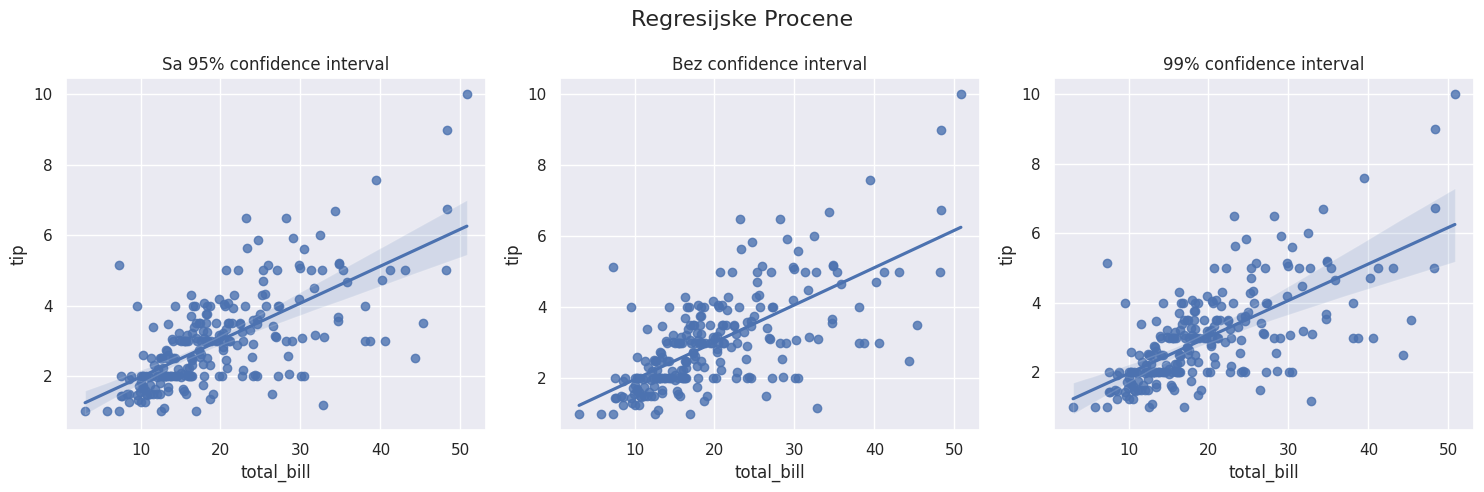

📈 REGRESIJSKA ANALIZA:
Slope (nagib): 0.105
R-squared: 0.457
Standard error: 0.0074
P-vrednost: 6.69e-34

🔍 INTERPRETACIJA:
• Za svaki $1 povećanja računa, napojnica raste za $0.11
• Model objašnjava 45.7% varijanse
• Veza je statistički značajna (p < 0.001)


In [25]:
# Regresijske procene
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Regresijske Procene', fontsize=16)

# 1. Sa confidence interval (default)
sns.regplot(data=tips, x='total_bill', y='tip', ax=axes[0])
axes[0].set_title('Sa 95% confidence interval')

# 2. Bez confidence interval
sns.regplot(data=tips, x='total_bill', y='tip', ci=None, ax=axes[1])
axes[1].set_title('Bez confidence interval')

# 3. Širi confidence interval
sns.regplot(data=tips, x='total_bill', y='tip', ci=99, ax=axes[2])
axes[2].set_title('99% confidence interval')

plt.tight_layout()
plt.show()

# Regresijska statistika
slope, intercept, r_value, p_value, std_err = stats.linregress(tips['total_bill'], tips['tip'])

print("📈 REGRESIJSKA ANALIZA:")
print(f"Slope (nagib): {slope:.3f}")
print(f"R-squared: {r_value**2:.3f}")
print(f"Standard error: {std_err:.4f}")
print(f"P-vrednost: {p_value:.2e}")

print(f"\n🔍 INTERPRETACIJA:")
print(f"• Za svaki $1 povećanja računa, napojnica raste za ${slope:.2f}")
print(f"• Model objašnjava {r_value**2*100:.1f}% varijanse")
print(f"• Veza je statistički značajna (p < 0.001)")

### 6. Multi-plot mreže

**Multi-plot mreže** omogućavaju kreiranje kompleksnih vizualizacija sa više panela.

**Seaborn pristup:**
- **FacetGrid** - osnovna mreža za custom plotove
- **catplot()** - kategorijski plotovi sa faceting
- **relplot()** - relational plotovi sa faceting
- **displot()** - distribucije sa faceting

**Parametri za faceting:**
- **col** - kolone po kategoriji
- **row** - redovi po kategoriji  
- **hue** - bojenje po kategoriji
- **wrap** - maksimalan broj kolona pre wrap

🔢 MULTI-PLOT MREŽE


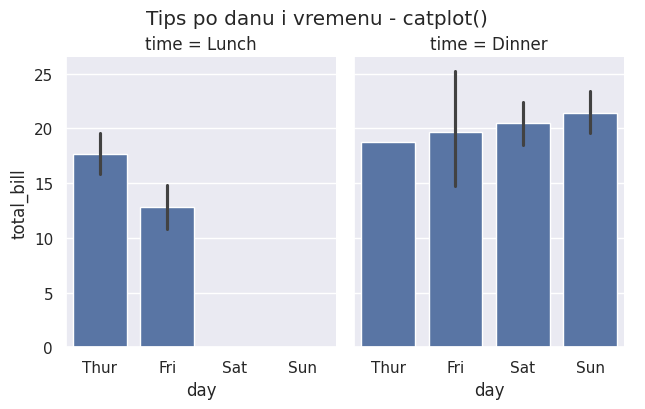

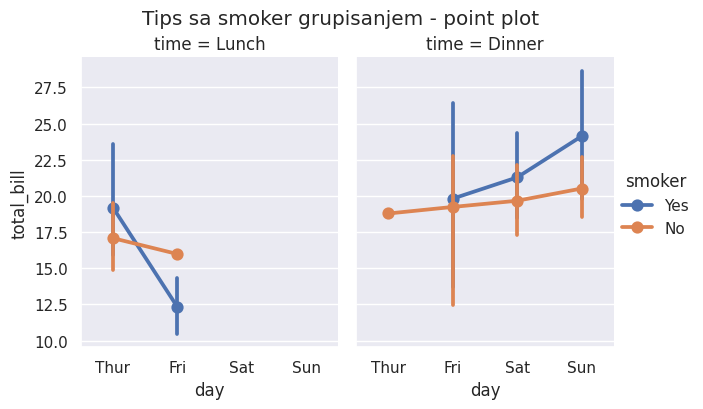

/home/luka/Desktop/Seabon seminarski/inv/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#4c72b0'` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/luka/Desktop/Seabon seminarski/inv/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#4c72b0'` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/luka/Desktop/Seabon seminarski/inv/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#4c72b0'` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/luka/Desktop/Seabon seminarski/inv/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color=

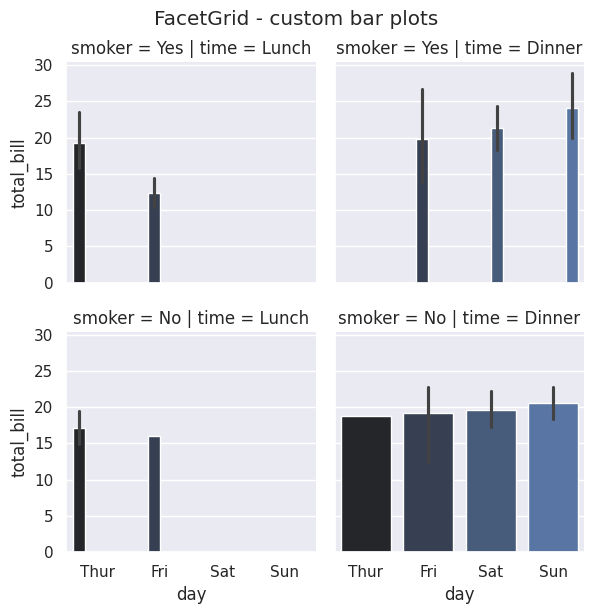

⚙️ MULTI-PLOT parametri:
• col/row: stvaraju panele po kategorijama
• height: visina svakog panela
• aspect: odnos širina/visina
• col_wrap: maksimalan broj kolona
• observed=False: za pandas groupby (izbegava warnings)

📊 KOMPLEKSNE STATISTIKE:
Top 10 kombinacija time-smoker-day:
                    count   mean    std
time   smoker day                      
Dinner Yes    Sun      19  24.12  10.44
              Sat      42  21.28  10.07
       No     Sun      57  20.51   8.13
       Yes    Fri       9  19.81  10.71
       No     Sat      45  19.66   8.94
              Fri       3  19.23   5.87
Lunch  Yes    Thur     17  19.19   8.36
Dinner No     Thur      1  18.78    NaN
Lunch  No     Thur     44  17.08   7.81
              Fri       1  15.98    NaN


In [26]:
# Multi-plot mreže
print("🔢 MULTI-PLOT MREŽE")

# 1. catplot() - figure-level kategorijski plotovi
g1 = sns.catplot(data=tips, x='day', y='total_bill', 
                 col='time', kind='bar', height=4, aspect=0.8)
g1.fig.suptitle('Tips po danu i vremenu - catplot()', y=1.02)
plt.show()

# 2. catplot() sa hue grupisanjem
g2 = sns.catplot(data=tips, x='day', y='total_bill', hue='smoker',
                 col='time', kind='point', height=4, aspect=0.8)
g2.fig.suptitle('Tips sa smoker grupisanjem - point plot', y=1.02)
plt.show()

# 3. FacetGrid - custom multi-plot
g3 = sns.FacetGrid(tips, col='time', row='smoker', height=3, aspect=1)
g3.map_dataframe(sns.barplot, x='day', y='total_bill')
g3.fig.suptitle('FacetGrid - custom bar plots', y=1.02)
plt.show()

print("⚙️ MULTI-PLOT parametri:")
print("• col/row: stvaraju panele po kategorijama")
print("• height: visina svakog panela") 
print("• aspect: odnos širina/visina")
print("• col_wrap: maksimalan broj kolona")
print("• observed=False: za pandas groupby (izbegava warnings)")

# Statistike za faceted analizu
facet_stats = tips.groupby(['time', 'smoker', 'day'], observed=False)['total_bill'].agg([
    'count', 'mean', 'std'
]).round(2)

print(f"\n📊 KOMPLEKSNE STATISTIKE:")
print("Top 10 kombinacija time-smoker-day:")
print(facet_stats.sort_values('mean', ascending=False).head(10))

### 7. Podešavanja grafikona

**Napredna podešavanja** za profesionalne vizualizacije:

**Osnovni elementi:**
- **Titles i labels** - nazivi i opise
- **Colors i palettes** - boje i teme
- **Fonts i sizes** - fontovi i veličine
- **Legends** - legende i pozicioniranje
- **Annotations** - dodatni tekstovi

🎨 NAPREDNA PODEŠAVANJA GRAFIKONA


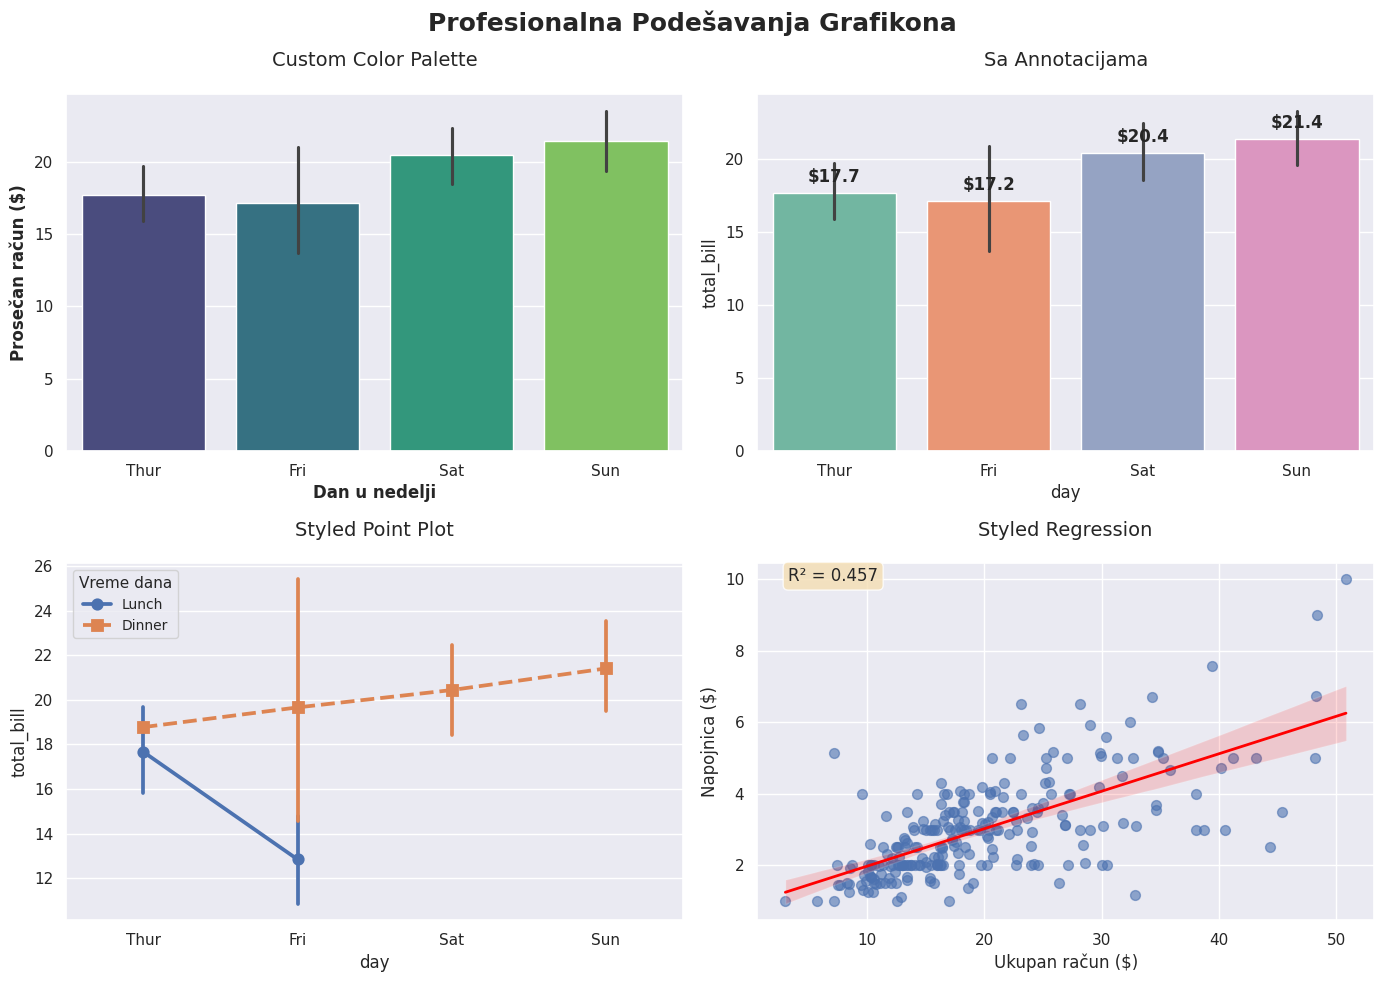

🎨 STYLING OPCIJE:
• palette: 'viridis', 'Set1', 'husl', 'coolwarm'
• markers: 'o', 's', '^', 'D' za point plots
• linestyles: '-', '--', '-.', ':' za linijske plotove
• alpha: transparentnost (0-1)
• fontweight: 'normal', 'bold', 'light'
• hue: dodajemo da izbegnemo deprecated warnings


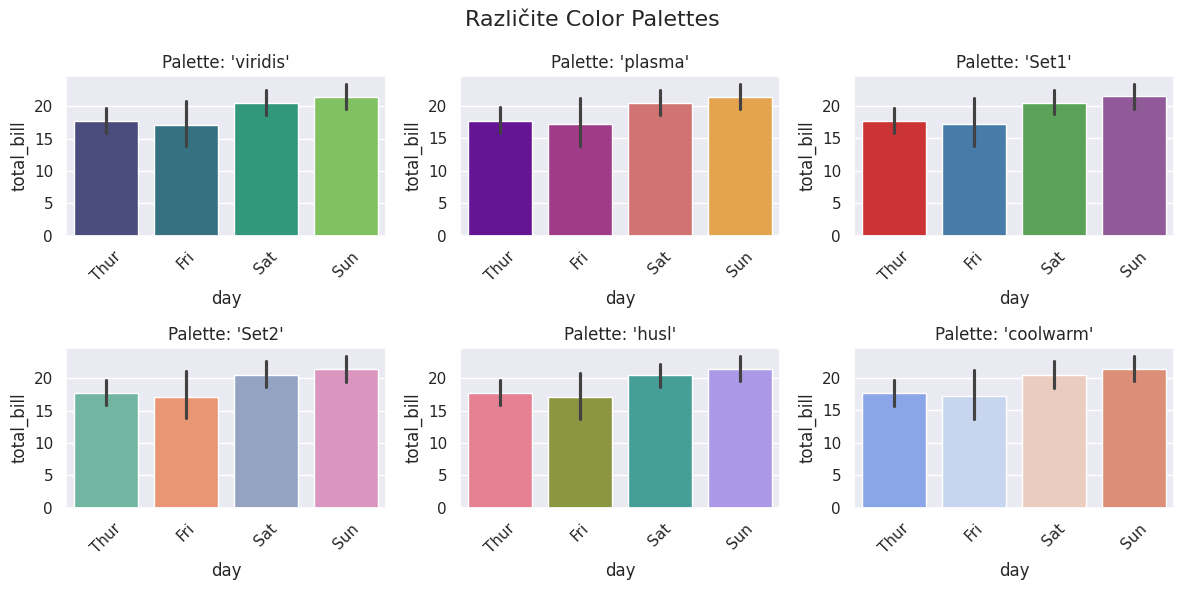

In [27]:
# Napredna podešavanja grafikona
print("🎨 NAPREDNA PODEŠAVANJA GRAFIKONA")

# Kreiranje figure sa custom podešavanjima
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Profesionalna Podešavanja Grafikona', fontsize=18, fontweight='bold', y=0.98)

# 1. Custom colors i palette
sns.barplot(data=tips, x='day', y='total_bill', hue='day',
           palette='viridis', legend=False, ax=axes[0,0])
axes[0,0].set_title('Custom Color Palette', fontsize=14, pad=20)
axes[0,0].set_xlabel('Dan u nedelji', fontsize=12, fontweight='bold')
axes[0,0].set_ylabel('Prosečan račun ($)', fontsize=12, fontweight='bold')

# 2. Annotated bar plot
ax1 = axes[0,1]
bars = sns.barplot(data=tips, x='day', y='total_bill', hue='day', 
                  palette='Set2', legend=False, ax=ax1)
ax1.set_title('Sa Annotacijama', fontsize=14, pad=20)

# Dodavanje vrednosti na barove
for i, bar in enumerate(bars.patches):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.5, 
             f'${height:.1f}', ha='center', va='bottom', fontweight='bold')

# 3. Styled point plot
sns.pointplot(data=tips, x='day', y='total_bill', hue='time', 
             ax=axes[1,0], markers=['o', 's'], linestyles=['-', '--'])
axes[1,0].set_title('Styled Point Plot', fontsize=14, pad=20)
axes[1,0].legend(title='Vreme dana', title_fontsize=11, fontsize=10)

# 4. Regplot sa custom styling
sns.regplot(data=tips, x='total_bill', y='tip', ax=axes[1,1],
           scatter_kws={'alpha': 0.6, 's': 50}, 
           line_kws={'color': 'red', 'linewidth': 2})
axes[1,1].set_title('Styled Regression', fontsize=14, pad=20)
axes[1,1].set_xlabel('Ukupan račun ($)', fontsize=12)
axes[1,1].set_ylabel('Napojnica ($)', fontsize=12)

# Dodavanje R² na regplot
r_squared = stats.pearsonr(tips['total_bill'], tips['tip'])[0]**2
axes[1,1].text(0.05, 0.95, f'R² = {r_squared:.3f}', 
              transform=axes[1,1].transAxes, fontsize=12,
              bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

print("🎨 STYLING OPCIJE:")
print("• palette: 'viridis', 'Set1', 'husl', 'coolwarm'")
print("• markers: 'o', 's', '^', 'D' za point plots")
print("• linestyles: '-', '--', '-.', ':' za linijske plotove")
print("• alpha: transparentnost (0-1)")
print("• fontweight: 'normal', 'bold', 'light'")
print("• hue: dodajemo da izbegnemo deprecated warnings")

# Color palette demonstracija
plt.figure(figsize=(12, 6))
palettes = ['viridis', 'plasma', 'Set1', 'Set2', 'husl', 'coolwarm']

for i, pal in enumerate(palettes):
    plt.subplot(2, 3, i+1)
    sns.barplot(data=tips, x='day', y='total_bill', hue='day', 
               palette=pal, legend=False)
    plt.title(f"Palette: '{pal}'")
    plt.xticks(rotation=45)

plt.suptitle('Različite Color Palettes', fontsize=16)
plt.tight_layout()
plt.show()

### 8. Naprednije regresijske procene

**Kompleksnije regresijske analize** sa detaljnim procenama greške:

**Tipovi regresija:**
- **Linearna regresija** - osnovna linearna veza
- **Polinomska regresija** - nelinearni odnosi
- **Logistička regresija** - kategorijski ishod
- **Robusna regresija** - otporna na outliere

**Mere preciznosti:**
- **MSE** - Mean Squared Error
- **RMSE** - Root Mean Squared Error  
- **MAE** - Mean Absolute Error
- **R²** - koeficijent determinacije

📊 NAPREDNJE REGRESIJSKE ANALIZE


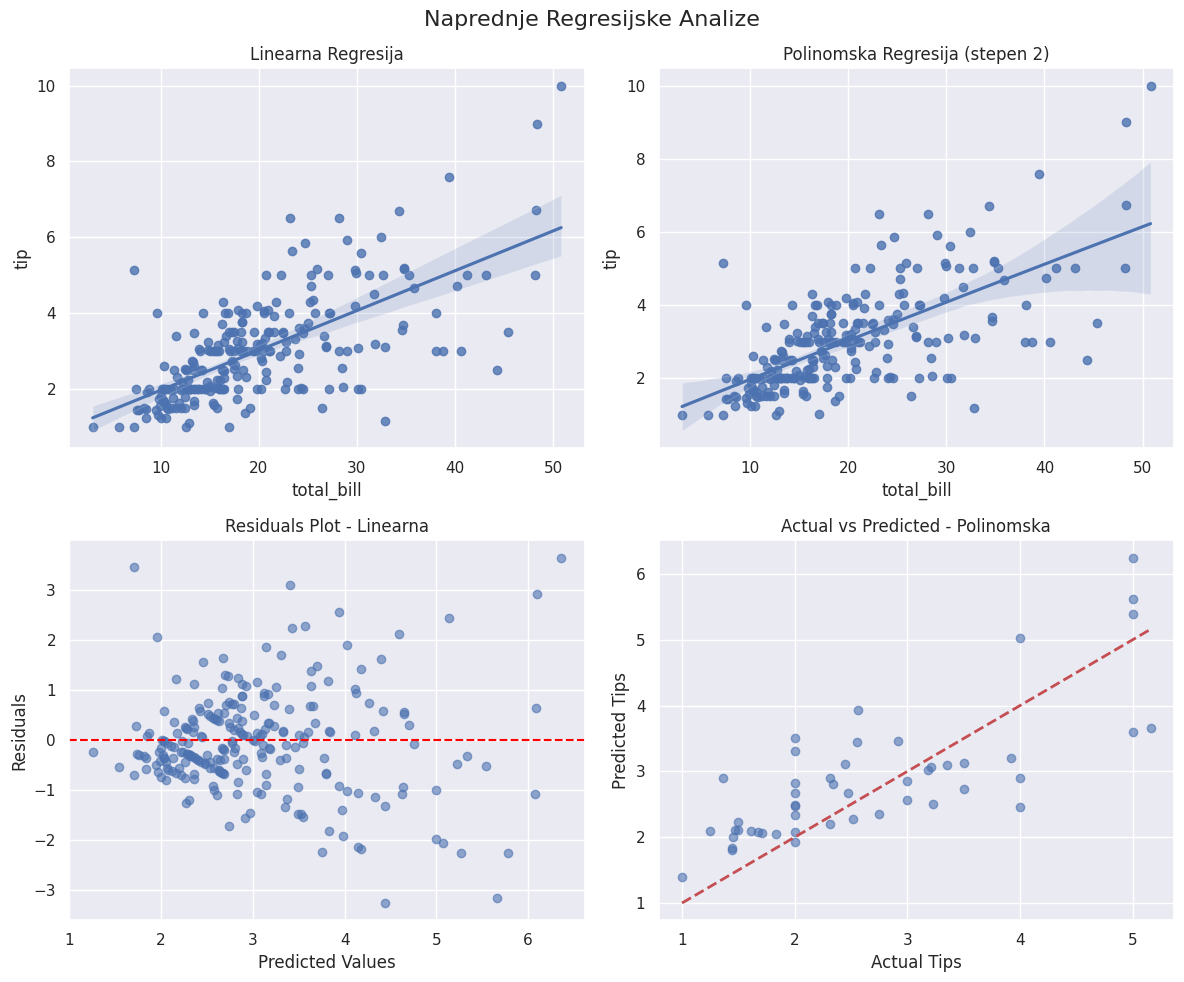

📈 EVALUACIJA MODELA:

LINEARNA REGRESIJA:
• MSE: 0.569
• RMSE: $0.754
• MAE: $0.621
• R²: 0.545

POLINOMSKA REGRESIJA:
• MSE: 0.587
• RMSE: $0.766
• MAE: $0.640
• R²: 0.530

🔍 INTERPRETACIJA:
• Linearna regresija je dovoljna (R²: 0.545)
• Tipična greška procene: ±$0.75
• Model objašnjava 54.5% varijanse napojnica


In [28]:
# Naprednje regresijske procene
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

print("📊 NAPREDNJE REGRESIJSKE ANALIZE")

# Priprema podataka
X = tips[['total_bill']].values
y = tips['tip'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Kreiranje različitih modela
models = {}

# 1. Linearna regresija
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
models['Linear'] = lin_reg

# 2. Polinomska regresija (stepen 2)
poly_features = PolynomialFeatures(degree=2)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)

poly_reg = LinearRegression()
poly_reg.fit(X_poly_train, y_train)
models['Polynomial'] = (poly_reg, poly_features)

# Vizualizacija različitih regresija
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Naprednje Regresijske Analize', fontsize=16)

# 1. Linearna regresija
sns.regplot(data=tips, x='total_bill', y='tip', ax=axes[0,0])
axes[0,0].set_title('Linearna Regresija')

# 2. Polinomska regresija
sns.regplot(data=tips, x='total_bill', y='tip', order=2, ax=axes[0,1])
axes[0,1].set_title('Polinomska Regresija (stepen 2)')

# 3. Residuals plot za linearnu regresiju
y_pred_lin = lin_reg.predict(X)
residuals = y - y_pred_lin
axes[1,0].scatter(y_pred_lin, residuals, alpha=0.6)
axes[1,0].axhline(y=0, color='red', linestyle='--')
axes[1,0].set_xlabel('Predicted Values')
axes[1,0].set_ylabel('Residuals')
axes[1,0].set_title('Residuals Plot - Linearna')

# 4. Poređenje actual vs predicted
y_pred_poly = poly_reg.predict(X_poly_test)
axes[1,1].scatter(y_test, y_pred_poly, alpha=0.6)
axes[1,1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1,1].set_xlabel('Actual Tips')
axes[1,1].set_ylabel('Predicted Tips')
axes[1,1].set_title('Actual vs Predicted - Polinomska')

plt.tight_layout()
plt.show()

# Evaluacija modela
print("📈 EVALUACIJA MODELA:")

# Linearna regresija rezultati
y_pred_lin_test = lin_reg.predict(X_test)
mse_lin = mean_squared_error(y_test, y_pred_lin_test)
rmse_lin = np.sqrt(mse_lin)
mae_lin = mean_absolute_error(y_test, y_pred_lin_test)
r2_lin = r2_score(y_test, y_pred_lin_test)

print(f"\nLINEARNA REGRESIJA:")
print(f"• MSE: {mse_lin:.3f}")
print(f"• RMSE: ${rmse_lin:.3f}")
print(f"• MAE: ${mae_lin:.3f}")
print(f"• R²: {r2_lin:.3f}")

# Polinomska regresija rezultati  
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
mae_poly = mean_absolute_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"\nPOLINOMSKA REGRESIJA:")
print(f"• MSE: {mse_poly:.3f}")
print(f"• RMSE: ${rmse_poly:.3f}")  
print(f"• MAE: ${mae_poly:.3f}")
print(f"• R²: {r2_poly:.3f}")

# Interpretacija
print(f"\n🔍 INTERPRETACIJA:")
if r2_poly > r2_lin:
    print(f"• Polinomska regresija bolje fituje podatke (R²: {r2_poly:.3f} vs {r2_lin:.3f})")
else:
    print(f"• Linearna regresija je dovoljna (R²: {r2_lin:.3f})")
    
print(f"• Tipična greška procene: ±${rmse_lin:.2f}")
print(f"• Model objašnjava {r2_lin*100:.1f}% varijanse napojnica")

### 9. Praktični primer - kompletna analiza

Demonstriraćemo sve tehnike na penguins datasetu.

🐧 PENGUINS DATASET ANALIZA - KOMBINUJEMO SVE TEHNIKE
Penguins dataset: (333, 7)


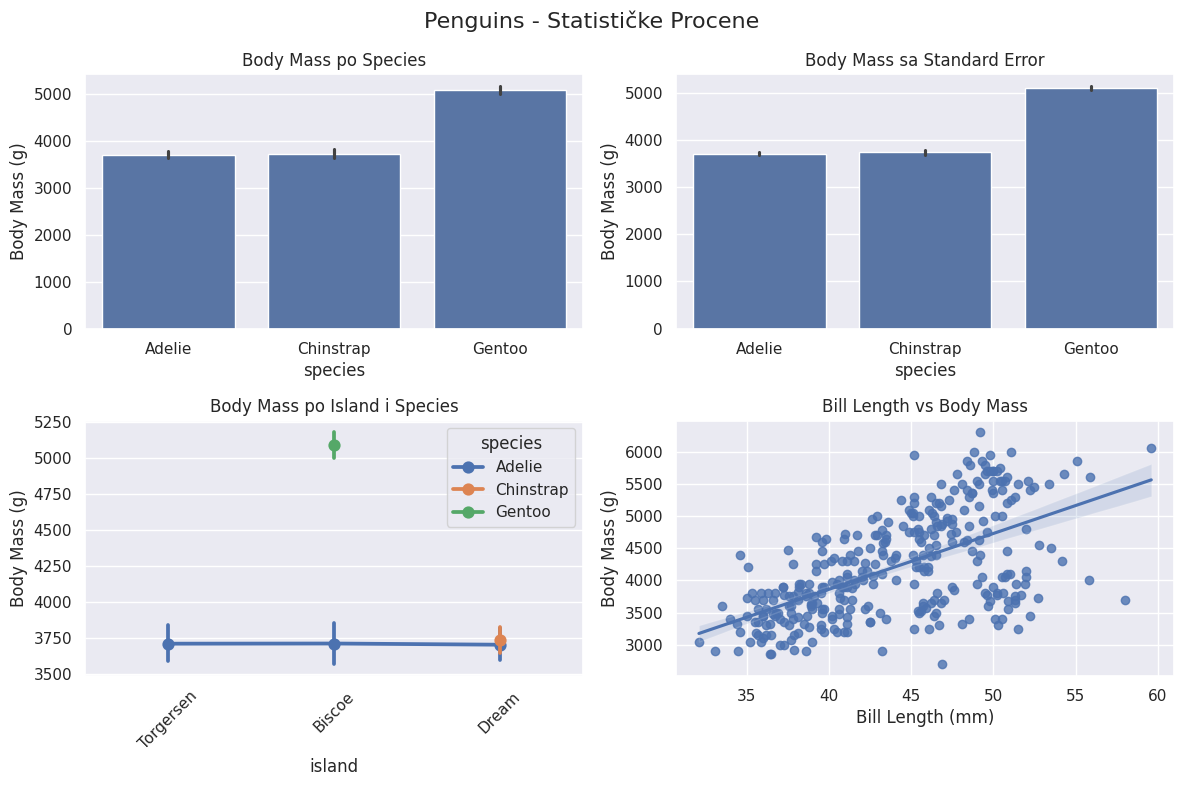

📊 STATISTIKE PO SPECIES:
           count     mean     std     min     max
species                                          
Adelie       146  3706.16  458.62  2850.0  4775.0
Chinstrap     68  3733.09  384.34  2700.0  4800.0
Gentoo       119  5092.44  501.48  3950.0  6300.0

🔗 KORELACIJA Bill Length vs Body Mass:
Korelacija: 0.589
P-vrednost: 1.54e-32
Interpretacija: Umerena pozitivna korelacija


In [29]:
# Praktični primer - Penguins
print("🐧 PENGUINS DATASET ANALIZA - KOMBINUJEMO SVE TEHNIKE")

# Uklanjanje missing values
penguins_clean = penguins.dropna()
print(f"Penguins dataset: {penguins_clean.shape}")

# Kreiranje subplotova
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Penguins - Statističke Procene', fontsize=16)

# 1. Body mass po species
sns.barplot(data=penguins_clean, x='species', y='body_mass_g', ax=axes[0,0])
axes[0,0].set_title('Body Mass po Species')
axes[0,0].set_ylabel('Body Mass (g)')

# 2. Body mass po species sa SE
sns.barplot(data=penguins_clean, x='species', y='body_mass_g', errorbar='se', ax=axes[0,1])
axes[0,1].set_title('Body Mass sa Standard Error')
axes[0,1].set_ylabel('Body Mass (g)')

# 3. Point plot sa island i species
sns.pointplot(data=penguins_clean, x='island', y='body_mass_g', hue='species', ax=axes[1,0])
axes[1,0].set_title('Body Mass po Island i Species')
axes[1,0].set_ylabel('Body Mass (g)')
axes[1,0].tick_params(axis='x', rotation=45)

# 4. Regresija bill_length vs body_mass
sns.regplot(data=penguins_clean, x='bill_length_mm', y='body_mass_g', ax=axes[1,1])
axes[1,1].set_title('Bill Length vs Body Mass')
axes[1,1].set_xlabel('Bill Length (mm)')
axes[1,1].set_ylabel('Body Mass (g)')

plt.tight_layout()
plt.show()

# Statistike po species
species_stats = penguins_clean.groupby('species', observed=False)['body_mass_g'].agg([
    'count', 'mean', 'std', 'min', 'max'
]).round(2)

print("📊 STATISTIKE PO SPECIES:")
print(species_stats)

# Korelacija bill_length vs body_mass
corr_coef, p_val = stats.pearsonr(penguins_clean['bill_length_mm'], penguins_clean['body_mass_g'])
print(f"\n🔗 KORELACIJA Bill Length vs Body Mass:")
print(f"Korelacija: {corr_coef:.3f}")
print(f"P-vrednost: {p_val:.2e}")
print(f"Interpretacija: {'Jaka' if abs(corr_coef) > 0.7 else 'Umerena' if abs(corr_coef) > 0.3 else 'Slaba'} pozitivna korelacija")

## 10. Zaključak

U ovom notebook-u smo pokrili sve aspekte statističkih procena i error bars:

### Što smo naučili:
- **Error bars** za prikazivanje nesigurnosti (sd, se, ci)
- **Bar plots vs Point plots** za različite svrhe
- **Različite estimatore** (mean, median, sum, count)
- **Regresijske procene** sa confidence intervals
- **Multi-plot mreže** (FacetGrid, catplot, relplot)
- **Napredna podešavanja grafikona** (colors, fonts, styling)
- **Napredje regresijske analize** sa procenama greške
- **Praktičnu interpretaciju** statističkih rezultata

### Ključni parametri:
1. **errorbar='sd'** - standard deviation
2. **errorbar='se'** - standard error
3. **errorbar='ci'** - confidence interval (default)
4. **estimator='median'** - koristi median umesto mean
5. **ci=None** - bez confidence interval u regplot
6. **col/row** - faceting u multi-plot mrežama
7. **palette** - color schemes za profesionalne vizualizacije

### Praktični saveti:
- **Kratki error bars** = preciznija procena
- **SD** pokazuje rasipanje podataka
- **SE** pokazuje preciznost procene
- **CI** pokazuje interval pouzdanosti
- **Point plots** bolje za poređenje trendova

### Kada koristiti:
- **SD** - kada želite pokazati varijabilnost podataka
- **SE** - kada želite pokazati preciznost procene
- **CI** - kada želite interval pouzdanosti (najčešće)
- **Point plots** - za trendove i poređenja
- **Bar plots** - za jasne pojedinačne vrednosti
- **Multi-plot mreže** - za kompleksne analize sa više faktora
- **Custom styling** - za profesionalne prezentacije

### Dodatno pokriveno:
- **FacetGrid i figure-level funkcije** za multi-plot mreže
- **Profesionalna podešavanja** grafikona (palettes, fonts, annotations)
- **Naprednje regresijske analize** sa sklearn integracijom
- **Model evaluacija** (MSE, RMSE, MAE, R²)
- **Residuals analiza** za validaciju pretpostavki

---

**Napomena**: Ovaj notebook pokriva kompletnu temu statističkih procena, multi-plot mreža i podešavanja grafikona. Kombinuje Seaborn sa scikit-learn za naprednje analize.